In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Q1
The data set of size n = 15 (Yield data) contains measurements of yield from an experiment done at
five different temperature levels. The variables are y = yield and x = temperature in degrees Fahrenheit.

a. Create a CSV file with sample data.

b. Write a Python function program to:
Find the fitted simple linear and polynomial regression equations for the given data.

c. Compare the coefficients obtained from manually intuitive and matrix formulation methods with
your program.

d. Plot the scatterplot of the raw data and then another scatterplot with lines pertaining to a linear fit
and a quadratic fit overlayed.

e. Compute the error, MSE, and RMSE.

In [2]:
df=pd.read_csv('yield_data.csv')

In [3]:
X=df['Temp.']
y=df['Yield']

In [4]:
n = len(X)
x_mean = np.mean(X)
y_mean = np.mean(y)
xy_sum = np.sum(X * y)
x_sum = np.sum(X)
y_sum = np.sum(y)
x_squared_sum = np.sum(X ** 2)
x_cube_sum = np.sum(X ** 3)
x_biquad_sum = np.sum(X ** 4)
x2y_sum = np.sum((X**2)*y)

## Linear Regression

### Intutive Method

In [5]:
b1=(np.sum((X-x_mean)*(y-y_mean)))/(np.sum((X-x_mean)**2))
b0=y_mean-b1*x_mean

print(f'B0 (intercept): {b0}')
print(f'B1 (slope): {b1}')

B0 (intercept): 2.306306306306306
B1 (slope): 0.006756756756756758


### Matrix Method

In [6]:
b1 = (n*xy_sum-x_sum*y_sum)/(n*x_squared_sum-(x_sum)**2)
b0 = y_mean-b1*x_mean

print(f'B0 (intercept): {b0}')
print(f'B1 (slope): {b1}')

B0 (intercept): 2.3063063063062974
B1 (slope): 0.006756756756756866


In [7]:
lin_y_pred = b0 + b1*X

lin_predicted_df = pd.DataFrame({'Temp (X)': X, 'Predicted Yield (y)': lin_y_pred})
lin_predicted_df

,Temp (X),Predicted Yield (y)
0,50,2.644144
1,50,2.644144
2,50,2.644144
3,70,2.779279
4,70,2.779279
5,70,2.779279
6,80,2.846847
7,80,2.846847
8,80,2.846847
9,90,2.914414


### Polynomial Regression

In [8]:
polyX = np.array([[n, x_sum, x_squared_sum],
         [x_sum, x_squared_sum, x_cube_sum],
         [x_squared_sum, x_cube_sum, x_biquad_sum]])

polyY=np.array([y_sum, xy_sum, x2y_sum])

A = np.dot(np.linalg.inv(polyX), polyY)
print(f'A = {A}')

A = [ 7.96048110e+00 -1.53711340e-01  1.07560137e-03]


In [9]:
a0, a1, a2=A[0], A[1], A[2]
poly_y_pred= a0 + a1*X + a2*(X**2)

poly_predicted_df = pd.DataFrame({'Temp (X)': X, 'Predicted Yield (y)': poly_y_pred})
poly_predicted_df

,Temp (X),Predicted Yield (y)
0,50,2.963918
1,50,2.963918
2,50,2.963918
3,70,2.471134
4,70,2.471134
5,70,2.471134
6,80,2.547423
7,80,2.547423
8,80,2.547423
9,90,2.838832


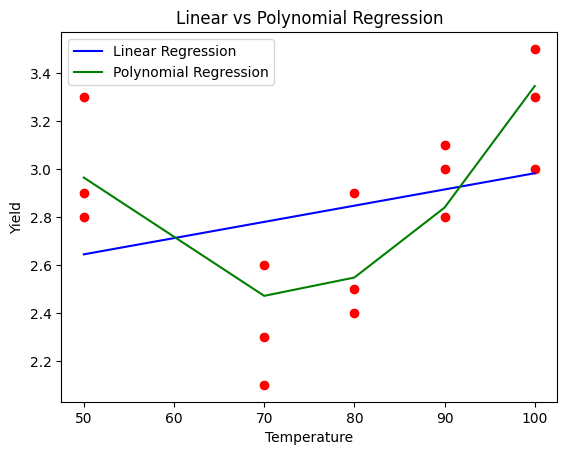

In [10]:
plt.plot(X, lin_y_pred, label='Linear Regression', color='blue')
plt.plot(X, poly_y_pred, label='Polynomial Regression', color='green')
plt.scatter(X, y, color='red')

plt.title('Linear vs Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Yield')
plt.legend()
plt.show()

In [11]:
MSE_linear = np.sum((y-lin_y_pred)**2) / n
MSE_poly = np.sum((y-poly_y_pred)**2) /n

print(f"MSE for Linear Regression: {MSE_linear}")
print(f"MSE for Polynomial Regression: {MSE_poly}")

MSE for Linear Regression: 0.13270870870870868
MSE for Polynomial Regression: 0.047784650630011465


In [12]:
RMSE_linear = np.sqrt(np.sum((y-lin_y_pred)**2) / n)
RMSE_poly = np.sqrt(np.sum((y-poly_y_pred)**2) /n)

print(f"RMSE for Linear Regression: {RMSE_linear}")
print(f"RMSE for Polynomial Regression: {RMSE_poly}")

RMSE for Linear Regression: 0.3642920651190589
RMSE for Polynomial Regression: 0.21859700508015079
